In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors  import KNeighborsRegressor as knr
import seaborn as sns
from random import randrange, uniform

In [2]:
#Set working directory
os.chdir("C:\\Users\sonij\Documents\DS-pro-1")

In [3]:
#Load data
bank_train = pd.read_csv("bank-loan.csv")
bank_data = bank_train[:700]

## Missing Value Analysis


In [41]:
missing_val = pd.DataFrame(bank_data.isnull().sum())
#Here we Detected that there is no  missing value in any varible
#SO we are not gonna skip these method here

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
default,0


## Outlier Analysis

In [5]:
#%matplotlib inline 
#plt.hist(bank_data['income'])

In [6]:
#save numeric continues names that can 
cnames = ["age","employ","income","debtinc","creddebt","othdebt"]

In [7]:
#Detect and delete outliers from data
for i in cnames:
    #print(i)
    q75, q25 = np.percentile(bank_data.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    #print(min)
    #print(max)
  
    bank_data = bank_data.drop(bank_data[bank_data.loc[:,i] < min].index)
    bank_data = bank_data.drop(bank_data[bank_data.loc[:,i] > max].index)

In [8]:
#missing_val = pd.DataFrame(train_data.isnull().sum())
#Here we Detected that there is no  missing value in any varible

## Feature Selection

In [9]:
#Correlation analysis
#Correlation plot
df_corr = bank_data.loc[:,cnames]

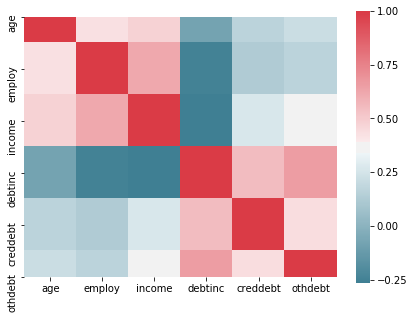

In [10]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [11]:
bank_data = bank_data.drop(['othdebt', 'creddebt'], axis=1)

## Feature Scaling

In [12]:
#save numeric continues names that can 
cnames = ["age","employ", "income", "address", "debtinc"]

In [13]:
# #Normality check
# %matplotlib inline  
# plt.hist(bank_data['debtinc'], bins='auto')

In [14]:
for i in cnames:
    bank_data[i] = pd.to_numeric(bank_data[i], downcast='float')

In [15]:
#Nomalisation
for i in cnames:
    #print(i)
    min = bank_data[i].min()
    max = bank_data[i].max()
    bank_data[i] = (bank_data[i] - min)/( max - min )

In [16]:
#Standarisation
for i in cnames:
    #print(i)
    bank_data[i] = (bank_data[i] - bank_data[i].mean())/bank_data[i].std()

## Sampling Techniques

## Apply ML Modal

###### Logistic Regression

In [17]:
training_data_logic = pd.DataFrame(bank_data["default"])

In [18]:
training_data_logic = training_data_logic.join(bank_data[cnames])

In [19]:
cat_names = ["ed"]

In [20]:
for i in cat_names:
        temp = pd.get_dummies(bank_data[i], prefix = i)
        training_data_logic = training_data_logic.join(temp)

In [21]:
Sample_Index = np.random.rand(len(training_data_logic)) < 0.8

train = training_data_logic[Sample_Index]
test = training_data_logic[~Sample_Index]

In [22]:
#training_data_logic.shape
train_cols = train.columns[1:8]

In [23]:
#Built Logistic Regression
import statsmodels.api as sm

logit = sm.Logit(train['default'], train[train_cols]).fit()

Optimization terminated successfully.
         Current function value: 0.448282
         Iterations 7


In [24]:
#Predict test data
test['Actual_prob'] = logit.predict(test[train_cols])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
test['ActualVal'] = 1
test.loc[test.Actual_prob < 0.5, 'ActualVal'] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [26]:
#Build confusion matrix
CM_LR = pd.crosstab(test['default'], test['ActualVal'])

###### Decison Tree

In [27]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [28]:
#Preparing data for decision tree
bank_data_DT = pd.DataFrame(bank_data)

#replace target categories with Yes or No
bank_data_DT["default"] = bank_data_DT["default"].replace(0, "no")
bank_data_DT["default"] = bank_data_DT["default"].replace(1, "yes") 

In [29]:
#Divide data into train and test
X = bank_data_DT.values[:, 0:6]
Y = bank_data_DT.values[:,6]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3)

In [30]:
#Decision Tree classifier
DT_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#predict new test cases
DT_Predictions = DT_model.predict(X_test)

In [31]:
#Build confusion matrix
CM_DT = pd.crosstab(y_test, DT_Predictions)

###### Random Forest

In [32]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 11).fit(X_train, y_train)

In [33]:
RF_Predictions = RF_model.predict(X_test)

In [34]:
#build confusion matrix for RF
CM_RF = pd.crosstab(y_test, RF_Predictions)

###### Naive Bayes

In [35]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [36]:
#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)

#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [37]:
#Build confusion matrix
CM_NB = pd.crosstab(y_test, NB_Predictions)

In [38]:
ML_modal = [CM_LR, CM_DT, CM_RF, CM_NB]
Modal_name = ["Logistc Regrassion", "Decision Tree", "Random Forest", "Naive bayes"]

In [39]:
#here we can see the accuracy and FNR score at one place of all of our modals
for i, j in zip(ML_modal, Modal_name):
    #let us save TP, TN, FP, FN
    TN = i.iloc[0,0]
    FN = i.iloc[1,0]
    TP = i.iloc[1,1]
    FP = i.iloc[0,1]
    
    print("\033[94m",j, "\033[0m")
    acc = ((TP+TN)*100)/(TP+TN+FP+FN)
    print(" Accuracy = ", acc)
    
    prec = (TP/(TP+FP))   
    print(" Precision  = ", prec)
    
    rcl = (TP/(TP+FN))   
    print(" Recall   = ", rcl)
    
    fp_rate = (FN*100)/(FN+TP)
    print(" FNR = ", fp_rate, )
    
    F1score = (2*prec*rcl)/(prec+rcl)
    print(" F1 Score = ", F1score,"\n" )

 Logistc Regrassion 
 Accuracy =  71.42857142857143
 Precision  =  0.4230769230769231
 Recall   =  0.34375
 FNR =  65.625
 F1 Score =  0.3793103448275862 

 Decision Tree 
 Accuracy =  70.05988023952096
 Precision  =  0.3181818181818182
 Recall   =  0.4117647058823529
 FNR =  58.8235294117647
 F1 Score =  0.358974358974359 

 Random Forest 
 Accuracy =  77.24550898203593
 Precision  =  0.43333333333333335
 Recall   =  0.38235294117647056
 FNR =  61.76470588235294
 F1 Score =  0.40625 

 Naive bayes 
 Accuracy =  72.45508982035928
 Precision  =  0.3695652173913043
 Recall   =  0.5
 FNR =  50.0
 F1 Score =  0.425 



In [40]:
#  Logistc Regrassion 
#  Accuracy =  81.81818181818181
#  FNR =  51.724137931034484 

#  Decision Tree 
#  Accuracy =  75.44910179640719
#  FNR =  60.97560975609756 

#  Random Forest 
#  Accuracy =  79.64071856287426
#  FNR =  53.65853658536585 

#  Naive bayes 
#  Accuracy =  76.04790419161677
#  FNR =  29.26829268292683 